<a href="https://colab.research.google.com/github/Daksh-Dhaker/Neural-Networks/blob/main/Generative_adv_networks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from tensorflow.keras.datasets import mnist

In [3]:
(X_train,y_train),(X_test,y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [5]:
only_zeros = X_train[y_train ==0]

In [6]:
only_zeros.shape

(5923, 28, 28)

In [7]:
# Discriminator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Reshape,Flatten
import tensorflow as tf

In [8]:
discriminator = Sequential()

discriminator.add(Flatten(input_shape = [28,28]))
discriminator.add(Dense(150,activation ='relu'))
discriminator.add(Dense(100,activation ='relu'))

discriminator.add(Dense(1,activation ='sigmoid'))

discriminator.compile(loss = 'binary_crossentropy',optimizer ='adam')




In [9]:
#Generator
codings_size = 100
generator = Sequential()

generator.add(Dense(100,activation = 'relu',input_shape = [codings_size]))
generator.add(Dense(150,activation = 'relu'))
generator.add(Dense(784,activation = 'relu'))

generator.add(Reshape([28,28]))


In [10]:
GAN = Sequential([generator,discriminator])

In [11]:
discriminator.trainable = False
GAN.compile(loss ='binary_crossentropy',optimizer ='adam')

In [12]:
batch_size = 32

In [13]:
my_data = only_zeros

In [14]:
dataset = tf.data.Dataset.from_tensor_slices(my_data).shuffle(buffer_size =1000)

In [15]:
dataset = dataset.batch(batch_size,drop_remainder= True).prefetch(1)

In [16]:
epochs =1

In [17]:
generator, discriminator = GAN.layers

for epoch in range(epochs):
  i=0
  for X_batch in dataset:
    i = i+1
    # Discriminator training phase
    noise = tf.random.normal(shape = [batch_size,codings_size])

    gen_images = generator(noise)

    X_fake_vs_real = tf.concat([gen_images,tf.dtypes.cast(X_batch,tf.float32)],axis =0)

    y1 = tf.constant([[0.0]]*batch_size + [[1.0]]*batch_size)

    discriminator.trainable = True

    discriminator.train_on_batch(X_fake_vs_real,y1)
    # Train generator
    noise = tf.random.normal(shape = [batch_size,codings_size])
    y2 = tf.constant([[1.0]]*batch_size)

    discriminator.trainable = False

    GAN.train_on_batch(noise,y2)



In [18]:
noise = tf.random.normal(shape = [10,codings_size])

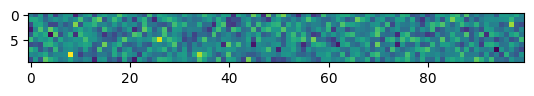

In [19]:
plt.imshow(noise)

In [20]:
images = generator(noise)

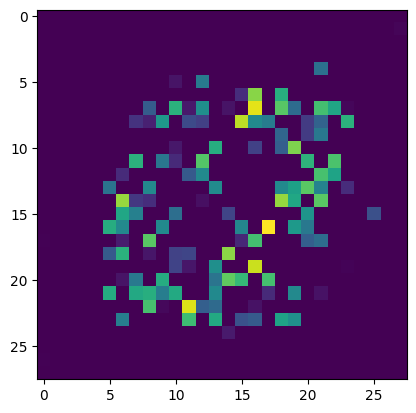

In [25]:
plt.imshow(images[9])